Batch normalization is not recommended as an alternative to proper data preparation , Neverthless it is used to standardize the raw input Data . ( The layer must specify the input_shape )

In [ ]:
model =  Sequential()
model.add(BatchNormalization(input_shape=(8,)))

In [ ]:
# Before A.F
model = Sequential()
model.add(Dense(32))
model.add(BatchNormalization())
model.add(Activation('relu'))

In [ ]:
# After A.F
model = Sequential()
model.add(Dense(32 , activation = 'relu'))
model.add(BatchNormalization())


In [29]:
import sklearn
from sklearn.datasets import make_circles
X , y = make_circles(n_samples = 1000 , noise = 0.1 , random_state = 1)
print(X.shape)
print(y.shape)
X

(1000, 2)
(1000,)


array([[ 0.92787748, -0.04521731],
       [-0.54303182, -0.75444674],
       [ 0.9246533 , -0.71492522],
       ...,
       [ 0.30720657, -0.63102334],
       [-0.92836187,  0.06693357],
       [ 1.03502248,  0.54878286]])

In [30]:
print(X[0:10,0])


[ 0.92787748 -0.54303182  0.9246533  -0.10217077 -1.01719242  0.41515227
 -0.90332353 -0.44454348 -0.82033072  0.88120362]


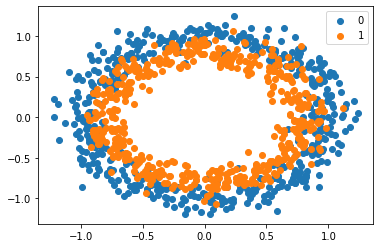

In [31]:
# This is a good example bcz classes cannot be separated by line , i.e:- non linear Data
import matplotlib.pyplot as plt
import numpy as np
for i in range(2):
    sample_idx = np.where(y == i)
    plt.scatter(X[sample_idx,0], X[sample_idx, 1], label = str(i))
plt.legend()
plt.show()

(array([[29., 91., 51., 42., 38., 39., 38., 58., 86., 28.],
        [41., 83., 42., 50., 42., 32., 42., 59., 77., 32.]]),
 array([-1.21713332, -0.97094422, -0.72475512, -0.47856603, -0.23237693,
         0.01381217,  0.26000126,  0.50619036,  0.75237946,  0.99856855,
         1.24475765]),
 <a list of 2 BarContainer objects>)

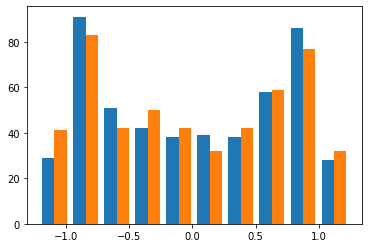

In [32]:
plt.hist(X[np.where(y == 0)])

In [3]:
y

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,

In [39]:
n_train = 500
X_train , X_test = X[:n_train,:], X[n_train:,:]
y_train , y_test = y[:n_train], y[n_train:]

uni , count = np.unique(y_train, return_counts = True)
print( uni , count)

[0 1] [252 248]


In [40]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD

# Simple model without batch Normalization

In [64]:
model = Sequential()
model.add(Dense(50, input_dim = 2 , activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dense(1, activation=  'sigmoid'))
opt=  SGD(lr = 0.01 , momentum = 0.9)
model.compile(loss='binary_crossentropy', metrics=['accuracy'] , optimizer = opt)

In [65]:
%%time
model_history = model.fit(X_train, y_train, validation_split = 0.1 ,epochs=100,verbose=2)

Epoch 1/100
15/15 - 1s - loss: 0.7356 - accuracy: 0.4911 - val_loss: 0.6984 - val_accuracy: 0.5400
Epoch 2/100
15/15 - 0s - loss: 0.6933 - accuracy: 0.5244 - val_loss: 0.6466 - val_accuracy: 0.7200
Epoch 3/100
15/15 - 0s - loss: 0.6890 - accuracy: 0.5178 - val_loss: 0.6430 - val_accuracy: 0.5800
Epoch 4/100
15/15 - 0s - loss: 0.6826 - accuracy: 0.5600 - val_loss: 0.6404 - val_accuracy: 0.7600
Epoch 5/100
15/15 - 0s - loss: 0.6844 - accuracy: 0.5222 - val_loss: 0.6744 - val_accuracy: 0.5200
Epoch 6/100
15/15 - 0s - loss: 0.6767 - accuracy: 0.5289 - val_loss: 0.6471 - val_accuracy: 0.6400
Epoch 7/100
15/15 - 0s - loss: 0.6667 - accuracy: 0.5422 - val_loss: 0.6426 - val_accuracy: 0.6200
Epoch 8/100
15/15 - 0s - loss: 0.6612 - accuracy: 0.6556 - val_loss: 0.6284 - val_accuracy: 0.7600
Epoch 9/100
15/15 - 0s - loss: 0.6612 - accuracy: 0.6178 - val_loss: 0.6024 - val_accuracy: 0.7400
Epoch 10/100
15/15 - 0s - loss: 0.6550 - accuracy: 0.6578 - val_loss: 0.6281 - val_accuracy: 0.7200
Epoch 11/

15/15 - 0s - loss: 0.4572 - accuracy: 0.7956 - val_loss: 0.4462 - val_accuracy: 0.8000
Epoch 84/100
15/15 - 0s - loss: 0.4368 - accuracy: 0.8022 - val_loss: 0.4224 - val_accuracy: 0.8400
Epoch 85/100
15/15 - 0s - loss: 0.4315 - accuracy: 0.8111 - val_loss: 0.4297 - val_accuracy: 0.8000
Epoch 86/100
15/15 - 0s - loss: 0.4254 - accuracy: 0.8311 - val_loss: 0.4226 - val_accuracy: 0.8600
Epoch 87/100
15/15 - 0s - loss: 0.4284 - accuracy: 0.8378 - val_loss: 0.4303 - val_accuracy: 0.8400
Epoch 88/100
15/15 - 0s - loss: 0.4314 - accuracy: 0.8289 - val_loss: 0.4117 - val_accuracy: 0.8200
Epoch 89/100
15/15 - 0s - loss: 0.4278 - accuracy: 0.8244 - val_loss: 0.4479 - val_accuracy: 0.8600
Epoch 90/100
15/15 - 0s - loss: 0.4251 - accuracy: 0.8200 - val_loss: 0.4110 - val_accuracy: 0.8600
Epoch 91/100
15/15 - 0s - loss: 0.4285 - accuracy: 0.8133 - val_loss: 0.4015 - val_accuracy: 0.8600
Epoch 92/100
15/15 - 0s - loss: 0.4338 - accuracy: 0.8089 - val_loss: 0.4260 - val_accuracy: 0.8200
Epoch 93/100


In [66]:
loss, acc = model.evaluate(X_train, y_train, verbose=0)

loss, acc1 = model.evaluate(X_test, y_test, verbose=2)
print('Train accuracy : {} , Test Accuracy: {}'.format(acc*100, acc1*100 ))


16/16 - 0s - loss: 0.4045 - accuracy: 0.8440
Train accuracy : 81.99999928474426 , Test Accuracy: 84.3999981880188


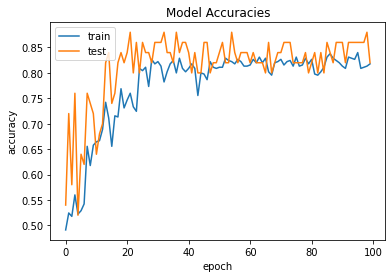

In [67]:
import matplotlib.pyplot as plt
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracies')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

# using Batch Normalization after A.F

In [68]:
model_1 = Sequential()
model_1.add(Dense(50, input_dim = 2 , activation = 'relu', kernel_initializer = 'he_uniform'))
model_1.add(BatchNormalization())
model_1.add(Dense(1, activation=  'sigmoid'))
opt=  SGD(lr = 0.01 , momentum = 0.9)
model_1.compile(loss='binary_crossentropy', metrics=['accuracy'] , optimizer = opt)

In [69]:
%%time
model_1_history = model_1.fit(X_train, y_train, validation_split = 0.1 ,epochs=100,verbose=2) 

Epoch 1/100
15/15 - 1s - loss: 0.8630 - accuracy: 0.4200 - val_loss: 0.7138 - val_accuracy: 0.4000
Epoch 2/100
15/15 - 0s - loss: 0.6971 - accuracy: 0.5600 - val_loss: 0.6573 - val_accuracy: 0.5800
Epoch 3/100
15/15 - 0s - loss: 0.5989 - accuracy: 0.7222 - val_loss: 0.6373 - val_accuracy: 0.5800
Epoch 4/100
15/15 - 0s - loss: 0.5425 - accuracy: 0.7911 - val_loss: 0.6253 - val_accuracy: 0.5800
Epoch 5/100
15/15 - 0s - loss: 0.5090 - accuracy: 0.7867 - val_loss: 0.6245 - val_accuracy: 0.5800
Epoch 6/100
15/15 - 0s - loss: 0.5058 - accuracy: 0.7667 - val_loss: 0.5702 - val_accuracy: 0.6200
Epoch 7/100
15/15 - 0s - loss: 0.4841 - accuracy: 0.7822 - val_loss: 0.6000 - val_accuracy: 0.6400
Epoch 8/100
15/15 - 0s - loss: 0.4586 - accuracy: 0.7889 - val_loss: 0.5147 - val_accuracy: 0.6800
Epoch 9/100
15/15 - 0s - loss: 0.5114 - accuracy: 0.7578 - val_loss: 0.5798 - val_accuracy: 0.6800
Epoch 10/100
15/15 - 0s - loss: 0.4313 - accuracy: 0.8133 - val_loss: 0.5087 - val_accuracy: 0.7200
Epoch 11/

15/15 - 0s - loss: 0.4623 - accuracy: 0.8089 - val_loss: 0.3709 - val_accuracy: 0.8400
Epoch 84/100
15/15 - 0s - loss: 0.4349 - accuracy: 0.8044 - val_loss: 0.3892 - val_accuracy: 0.8400
Epoch 85/100
15/15 - 0s - loss: 0.4806 - accuracy: 0.7689 - val_loss: 0.3911 - val_accuracy: 0.8400
Epoch 86/100
15/15 - 0s - loss: 0.4330 - accuracy: 0.7911 - val_loss: 0.3953 - val_accuracy: 0.8600
Epoch 87/100
15/15 - 0s - loss: 0.4346 - accuracy: 0.7956 - val_loss: 0.4101 - val_accuracy: 0.8200
Epoch 88/100
15/15 - 0s - loss: 0.4340 - accuracy: 0.7867 - val_loss: 0.4208 - val_accuracy: 0.8400
Epoch 89/100
15/15 - 0s - loss: 0.4429 - accuracy: 0.8067 - val_loss: 0.4057 - val_accuracy: 0.8200
Epoch 90/100
15/15 - 0s - loss: 0.4767 - accuracy: 0.7933 - val_loss: 0.4125 - val_accuracy: 0.8400
Epoch 91/100
15/15 - 0s - loss: 0.4396 - accuracy: 0.7778 - val_loss: 0.4066 - val_accuracy: 0.8400
Epoch 92/100
15/15 - 0s - loss: 0.4500 - accuracy: 0.7689 - val_loss: 0.4079 - val_accuracy: 0.8200
Epoch 93/100


In [70]:
loss, acc = model_1.evaluate(X_train, y_train, verbose=0)

loss, acc1 = model_1.evaluate(X_test, y_test, verbose=2)
print('Train accuracy : {} , Test Accuracy: {}'.format(acc*100, acc1*100 ))


16/16 - 0s - loss: 0.3786 - accuracy: 0.8380
Train accuracy : 83.39999914169312 , Test Accuracy: 83.79999995231628


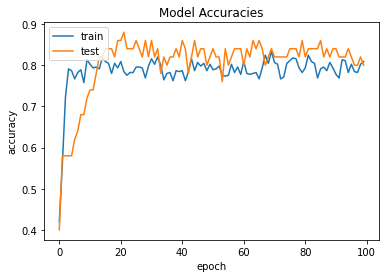

In [71]:
import matplotlib.pyplot as plt
plt.plot(model_1_history.history['accuracy'])
plt.plot(model_1_history.history['val_accuracy'])
plt.title('Model Accuracies')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Applying Batch-Normalization before A.F

Note : At this Data we can easily see that batchNormalization is more effective then after applying A.F

In [72]:
from tensorflow.keras.layers import Activation
model_2 = Sequential()
model_2.add(Dense(50 , input_dim = 2 , kernel_initializer = 'he_uniform'))
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))
model_2.add(Dense(1, activation=  'sigmoid'))
model_2.compile(loss='binary_crossentropy', metrics=['accuracy'] , optimizer = opt)

In [73]:
%%time
model_2_history = model_2.fit(X_train, y_train, validation_split = 0.1 ,epochs=100,verbose=2) 

Epoch 1/100
15/15 - 1s - loss: 0.7523 - accuracy: 0.4844 - val_loss: 0.6925 - val_accuracy: 0.5600
Epoch 2/100
15/15 - 0s - loss: 0.7061 - accuracy: 0.5000 - val_loss: 0.6477 - val_accuracy: 0.6400
Epoch 3/100
15/15 - 0s - loss: 0.6834 - accuracy: 0.5622 - val_loss: 0.6490 - val_accuracy: 0.7000
Epoch 4/100
15/15 - 0s - loss: 0.6863 - accuracy: 0.5044 - val_loss: 0.6333 - val_accuracy: 0.7200
Epoch 5/100
15/15 - 0s - loss: 0.6769 - accuracy: 0.5556 - val_loss: 0.6689 - val_accuracy: 0.6600
Epoch 6/100
15/15 - 0s - loss: 0.6716 - accuracy: 0.6000 - val_loss: 0.6388 - val_accuracy: 0.7200
Epoch 7/100
15/15 - 0s - loss: 0.6658 - accuracy: 0.5467 - val_loss: 0.6085 - val_accuracy: 0.6800
Epoch 8/100
15/15 - 0s - loss: 0.6646 - accuracy: 0.6067 - val_loss: 0.6189 - val_accuracy: 0.7400
Epoch 9/100
15/15 - 0s - loss: 0.6607 - accuracy: 0.6156 - val_loss: 0.6240 - val_accuracy: 0.7400
Epoch 10/100
15/15 - 0s - loss: 0.6612 - accuracy: 0.6156 - val_loss: 0.6439 - val_accuracy: 0.7200
Epoch 11/

15/15 - 0s - loss: 0.5686 - accuracy: 0.6978 - val_loss: 0.4793 - val_accuracy: 0.8400
Epoch 84/100
15/15 - 0s - loss: 0.6197 - accuracy: 0.6600 - val_loss: 0.4976 - val_accuracy: 0.8000
Epoch 85/100
15/15 - 0s - loss: 0.5834 - accuracy: 0.6667 - val_loss: 0.4379 - val_accuracy: 0.9000
Epoch 86/100
15/15 - 0s - loss: 0.5534 - accuracy: 0.7133 - val_loss: 0.4430 - val_accuracy: 0.8600
Epoch 87/100
15/15 - 0s - loss: 0.5482 - accuracy: 0.7311 - val_loss: 0.4399 - val_accuracy: 0.8800
Epoch 88/100
15/15 - 0s - loss: 0.5624 - accuracy: 0.6933 - val_loss: 0.4657 - val_accuracy: 0.8200
Epoch 89/100
15/15 - 0s - loss: 0.5964 - accuracy: 0.6867 - val_loss: 0.4616 - val_accuracy: 0.8400
Epoch 90/100
15/15 - 0s - loss: 0.5352 - accuracy: 0.7422 - val_loss: 0.4541 - val_accuracy: 0.8600
Epoch 91/100
15/15 - 0s - loss: 0.5307 - accuracy: 0.7311 - val_loss: 0.4439 - val_accuracy: 0.8600
Epoch 92/100
15/15 - 0s - loss: 0.5821 - accuracy: 0.6778 - val_loss: 0.4333 - val_accuracy: 0.8400
Epoch 93/100


In [74]:
loss, acc = model_2.evaluate(X_train, y_train, verbose=0)

loss, acc1 = model_2.evaluate(X_test, y_test, verbose=2)
print('Train accuracy : {} , Test Accuracy: {}'.format(acc*100, acc1*100 ))


16/16 - 0s - loss: 0.4992 - accuracy: 0.8020
Train accuracy : 76.99999809265137 , Test Accuracy: 80.19999861717224


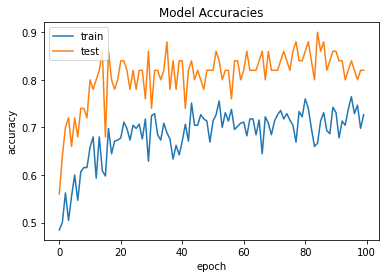

In [75]:
plt.plot(model_2_history.history['accuracy'])
plt.plot(model_2_history.history['val_accuracy'])
plt.title('Model Accuracies')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Batch-Normalization with diffrent parameters

In [76]:
model_3 = Sequential()
model_3.add(Dense(50, input_dim = 2 , activation = 'relu', kernel_initializer = 'he_uniform'))
model_3.add(BatchNormalization(center= False , scale = False))
model_3.add(Dense(1, activation=  'sigmoid'))
opt=  SGD(lr = 0.01 , momentum = 0.9)
model_3.compile(loss='binary_crossentropy', metrics=['accuracy'] , optimizer = opt)

In [77]:
%%time
model_3_history = model_3.fit(X_train, y_train, validation_split = 0.1 ,epochs=100,verbose=2) 

Epoch 1/100
15/15 - 1s - loss: 0.7757 - accuracy: 0.4689 - val_loss: 0.7030 - val_accuracy: 0.4600
Epoch 2/100
15/15 - 0s - loss: 0.6592 - accuracy: 0.6178 - val_loss: 0.6659 - val_accuracy: 0.5800
Epoch 3/100
15/15 - 0s - loss: 0.6240 - accuracy: 0.6400 - val_loss: 0.7760 - val_accuracy: 0.5800
Epoch 4/100
15/15 - 0s - loss: 0.5473 - accuracy: 0.7578 - val_loss: 0.7785 - val_accuracy: 0.5800
Epoch 5/100
15/15 - 0s - loss: 0.5204 - accuracy: 0.7622 - val_loss: 0.7359 - val_accuracy: 0.5800
Epoch 6/100
15/15 - 0s - loss: 0.5222 - accuracy: 0.7533 - val_loss: 0.7507 - val_accuracy: 0.5800
Epoch 7/100
15/15 - 0s - loss: 0.4798 - accuracy: 0.7956 - val_loss: 0.7051 - val_accuracy: 0.6000
Epoch 8/100
15/15 - 0s - loss: 0.4747 - accuracy: 0.7844 - val_loss: 0.6310 - val_accuracy: 0.6200
Epoch 9/100
15/15 - 0s - loss: 0.4580 - accuracy: 0.8111 - val_loss: 0.6418 - val_accuracy: 0.6400
Epoch 10/100
15/15 - 0s - loss: 0.4697 - accuracy: 0.7733 - val_loss: 0.6020 - val_accuracy: 0.6800
Epoch 11/

15/15 - 0s - loss: 0.4050 - accuracy: 0.8089 - val_loss: 0.4169 - val_accuracy: 0.8600
Epoch 84/100
15/15 - 0s - loss: 0.4189 - accuracy: 0.8000 - val_loss: 0.4046 - val_accuracy: 0.8600
Epoch 85/100
15/15 - 0s - loss: 0.4261 - accuracy: 0.8200 - val_loss: 0.3968 - val_accuracy: 0.8200
Epoch 86/100
15/15 - 0s - loss: 0.4503 - accuracy: 0.7889 - val_loss: 0.4052 - val_accuracy: 0.8600
Epoch 87/100
15/15 - 0s - loss: 0.4409 - accuracy: 0.7933 - val_loss: 0.4138 - val_accuracy: 0.8600
Epoch 88/100
15/15 - 0s - loss: 0.4202 - accuracy: 0.8156 - val_loss: 0.4212 - val_accuracy: 0.8400
Epoch 89/100
15/15 - 0s - loss: 0.4497 - accuracy: 0.8067 - val_loss: 0.4272 - val_accuracy: 0.8400
Epoch 90/100
15/15 - 0s - loss: 0.4105 - accuracy: 0.7844 - val_loss: 0.4200 - val_accuracy: 0.8400
Epoch 91/100
15/15 - 0s - loss: 0.4749 - accuracy: 0.7844 - val_loss: 0.4363 - val_accuracy: 0.8400
Epoch 92/100
15/15 - 0s - loss: 0.4441 - accuracy: 0.8044 - val_loss: 0.4305 - val_accuracy: 0.8200
Epoch 93/100


In [78]:
loss, acc = model_3.evaluate(X_train, y_train, verbose=0)

loss, acc1 = model_3.evaluate(X_test, y_test, verbose=2)
print('Train accuracy : {} , Test Accuracy: {}'.format(acc*100, acc1*100 ))


16/16 - 0s - loss: 0.3702 - accuracy: 0.8320
Train accuracy : 81.40000104904175 , Test Accuracy: 83.20000171661377


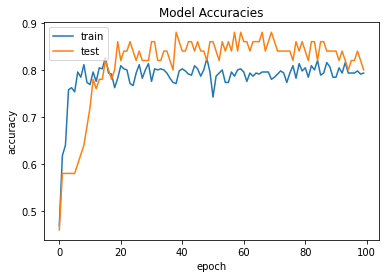

In [80]:
plt.plot(model_3_history.history['accuracy'])
plt.plot(model_3_history.history['val_accuracy'])
plt.title('Model Accuracies')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()